In [4]:
import pandas as pd
df = pd.read_csv('ToyotaCorolla - MLR.csv')
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [2]:
# 1. Perform Exploratory Data Analysis (EDA)
# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min     1300.00000     2.0

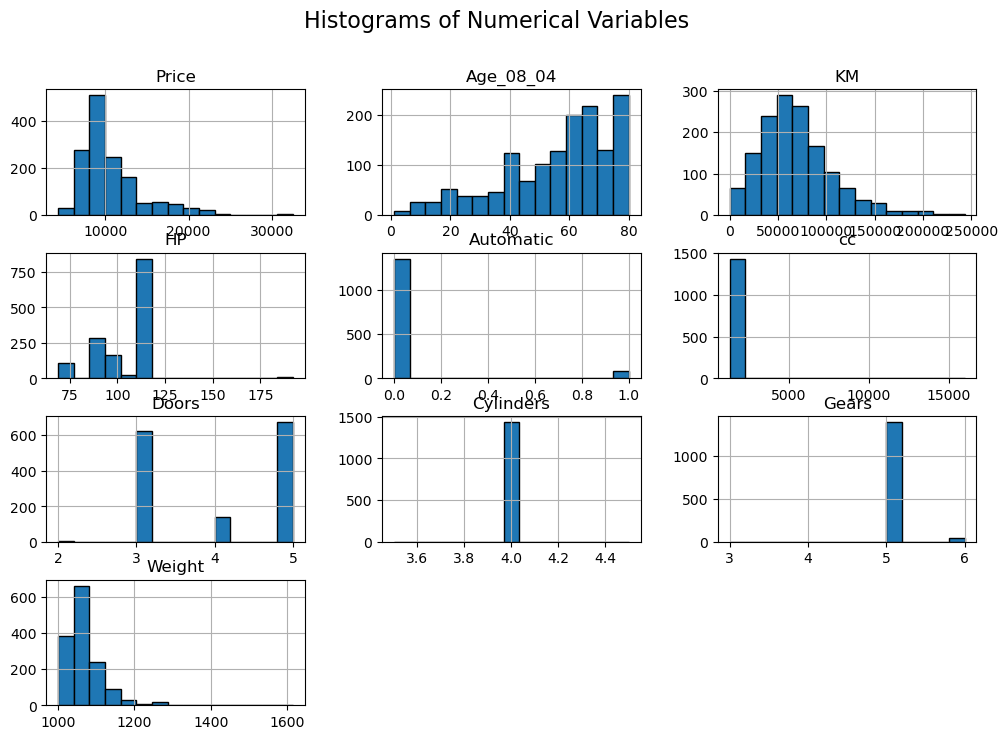

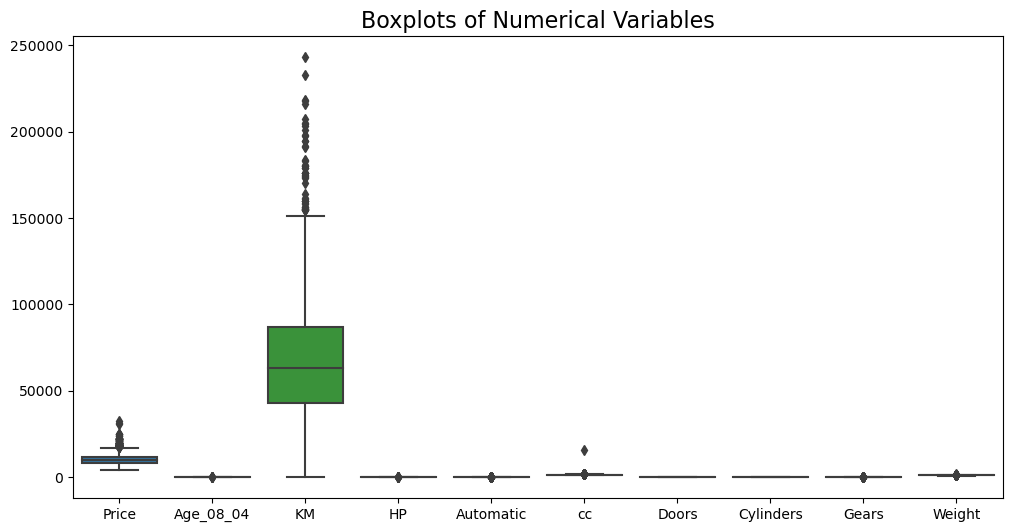

C:\Users\Syed Yaseen Ali\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Syed Yaseen Ali\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Syed Yaseen Ali\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Syed Yaseen Ali\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

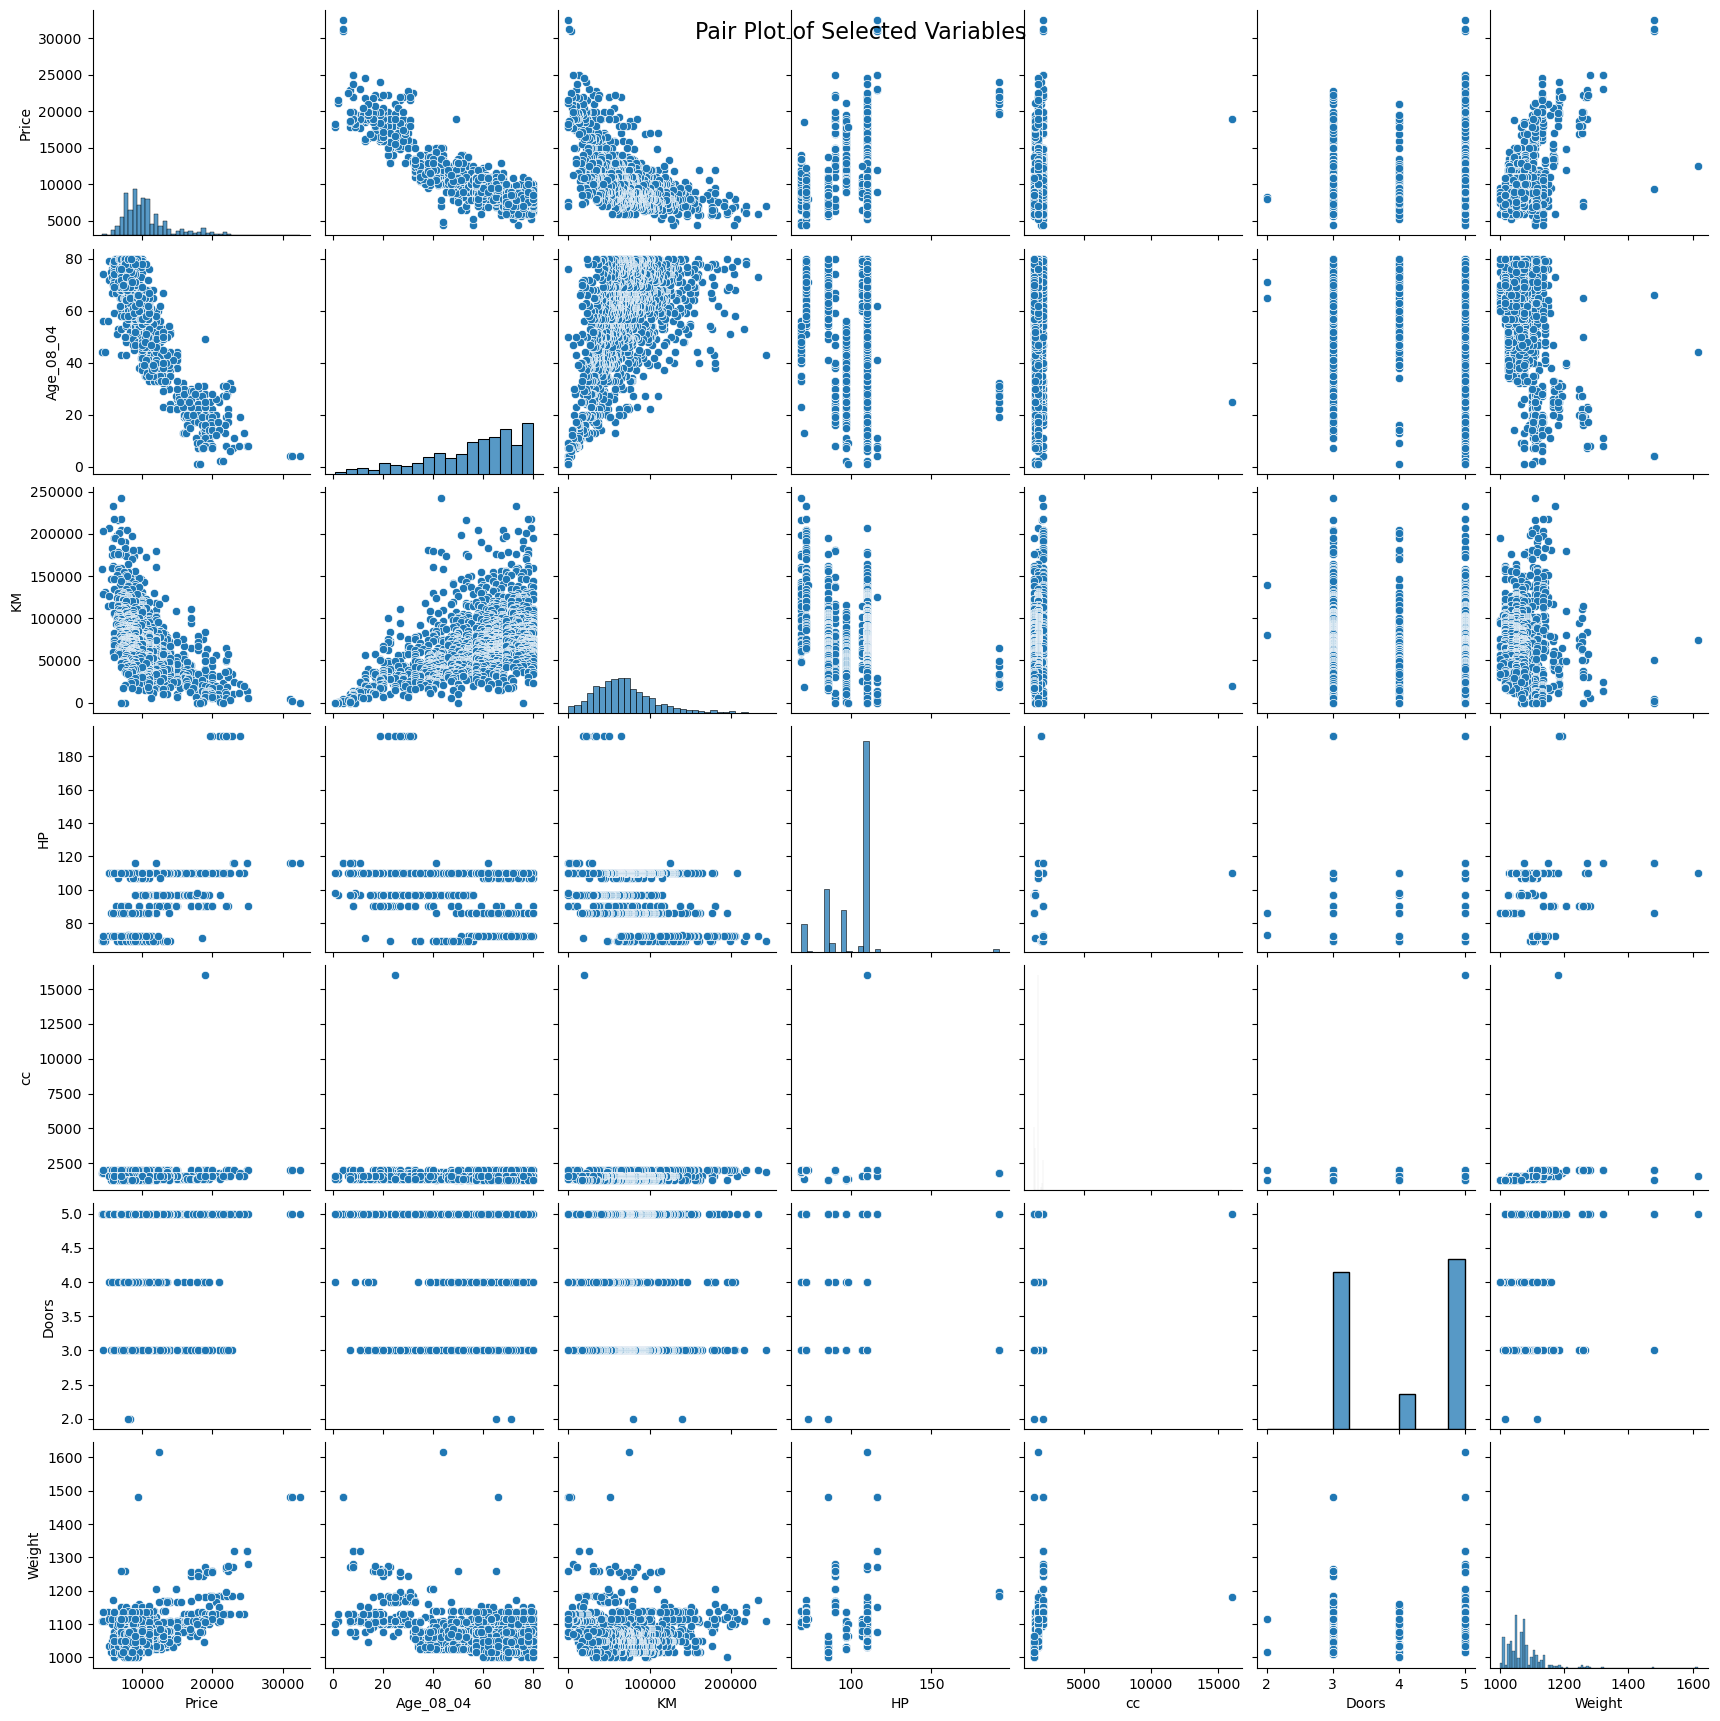

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograms for numerical variables
df.hist(figsize=(12, 8), bins=15, edgecolor='black')
plt.suptitle('Histograms of Numerical Variables', fontsize=16)
plt.show()

# Boxplots for numerical variables
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title('Boxplots of Numerical Variables', fontsize=16)
plt.show()

# Pair plot for relationships between variables
sns.pairplot(df, vars=['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Weight'])
plt.suptitle('Pair Plot of Selected Variables', fontsize=16)
plt.show()

In [45]:
# Pre processing the data
# One-hot encoding
X_cate = df[['Fuel_Type']]

# Apply one-hot encoding to categorical columns
X_encoded = pd.get_dummies(X_cate)
list(X_encoded)
X_encoded.head()

,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,False,True,False
1,False,True,False
2,False,True,False
3,False,True,False
4,False,True,False


In [46]:
# Scale the numerical features using StandardScaler
X_cont = df[['Price', 'Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Cylinders',
             'Gears', 'Weight']]

from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X_cont_SS = SS.fit_transform(X_cont)
X_cont_SS = pd.DataFrame(X_cont_SS)
X_cont_SS.columns = list(X_cont)
X_cont_SS.head() 

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,0.763763,-1.771966,-0.574695,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561
1,0.832715,-1.771966,0.117454,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561
2,0.887877,-1.718184,-0.715386,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561
3,1.163685,-1.610620,-0.547650,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561
4,0.832715,-1.395491,-0.801028,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.853577


In [59]:
# Split the data into features (X) and target variable (y)
X = pd.concat([X_cont_SS, X_encoded], axis=1)
print(X.shape)

y = X['Price']
print(y.shape) 

(1436, 13)
(1436,)


In [60]:
# 2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [61]:
# 3.Build a multiple linear regression model using the training dataset:
from sklearn.linear_model import LinearRegression

# Model 1: All features
LR1 = LinearRegression()
LR1.fit(X_train, y_train)
y_pred1 = LR1.predict(X_test) 

# Model 2: Selected features (Age, KM, HP)
X_train_selected = X_train.iloc[:, 1:4]
X_test_selected = X_test.iloc[:, 1:4]

LR2 = LinearRegression() 
LR2.fit(X_train_selected, y_train)
y_pred2 = LR2.predict(X_test_selected)

# Model 3: Selected features (Age, KM, HP, Automatic)
X_train_selected = X_train.iloc[:, 1:5] 
X_test_selected = X_test.iloc[:, 1:5]

LR3 = LinearRegression()
LR3.fit(X_train_selected, y_train)
y_pred3 = LR3.predict(X_test_selected)

In [62]:
# 4.Evaluating the performance of the models:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Evaluate Model 1
mse1 = mean_squared_error(y_test, y_pred1)
rmse1 = np.sqrt(mse1)
r2_1 = r2_score(y_test, y_pred1)

# Evaluate Model 2
mse2 = mean_squared_error(y_test, y_pred2)
rmse2 = np.sqrt(mse2)
r2_2 = r2_score(y_test, y_pred2)

# Evaluate Model 3
mse3 = mean_squared_error(y_test, y_pred3)
rmse3 = np.sqrt(mse3)
r2_3 = r2_score(y_test, y_pred3)

# Print evaluation metrics
print("Model 1 - All Features:")
print("Coefficients:", model1.coef_)
print("Intercept:", model1.intercept_)
print("Mean Squared Error:", mse1)
print("Root Mean Squared Error:", rmse1)
print("R-squared:", r2_1)

print("\nModel 2 - Selected Features: (Age, KM, HP)")
print("Coefficients:", model2.coef_)
print("Intercept:", model2.intercept_)
print("Mean Squared Error:", mse2)
print("Root Mean Squared Error:", rmse2)
print("R-squared:", r2_2)

print("\nModel 3 - Selected Features: (Age, KM, HP, cc)")
print("Coefficients:", model3.coef_)
print("Intercept:", model3.intercept_) 
print("Mean Squared Error:", mse3)
print("Root Mean Squared Error:", rmse3)
print("R-squared:", r2_3)

Model 1 - All Features:
Coefficients: [ 1.00000000e+00 -6.08109317e-16 -4.44901685e-16  1.81989960e-16
 -1.14436961e-17  1.04781015e-16  2.01324069e-16  1.15300660e-17
  7.30765592e-17  5.03122171e-16 -8.51168223e-17 -1.53920220e-16
 -8.46029680e-17]
Intercept: 8.673617379884035e-17
Mean Squared Error: 2.235666358159414e-31
Root Mean Squared Error: 4.728283365196521e-16
R-squared: 1.0

Model 2 - Selected Features: (Age, KM, HP)
Coefficients: [-0.79902022 -0.11744655  0.15950181]
Intercept: 0.0022245562438350554
Mean Squared Error: 0.1686728931057481
Root Mean Squared Error: 0.41069805588260105
R-squared: 0.824147424621203

Model 3 - Selected Features: (Age, KM, HP, cc)
Coefficients: [-0.80392441 -0.1095575   0.16020742  0.05128874]
Intercept: 0.002911969606510637
Mean Squared Error: 0.1680840446849029
Root Mean Squared Error: 0.4099805418369302
R-squared: 0.8247613377960274


In [51]:
# 5.Apply Lasso and Ridge methods on the model:
from sklearn.linear_model import Lasso, Ridge

# Lasso Regression
lasso_model = Lasso(alpha=0.1)  
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

print("\nLasso Regression:")
print("Coefficients:", lasso_model.coef_)
print("Intercept:", lasso_model.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lasso))
print("R-squared:", r2_score(y_test, y_pred_lasso))

# Ridge Regression
ridge_model = Ridge(alpha=0.1) 
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

print("\nRidge Regression:")
print("Coefficients:", ridge_model.coef_)
print("Intercept:", ridge_model.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_ridge))
print("R-squared:", r2_score(y_test, y_pred_ridge))


Lasso Regression:
Coefficients: [ 0.89500234 -0.         -0.          0.          0.          0.
  0.          0.          0.          0.         -0.          0.
 -0.        ]
Intercept: -0.0008297168242400099
Mean Squared Error: 0.01311962299407419
R-squared: 0.9889610907035883

Ridge Regression:
Coefficients: [ 9.99338000e-01 -4.25083965e-04 -1.24158465e-04  6.90796531e-05
  1.41054799e-05 -1.82649262e-06 -5.06807183e-06  0.00000000e+00
  2.08874053e-05  1.76089494e-04 -1.01760823e-04  2.34900709e-05
  7.82707517e-05]
Intercept: -7.079309512429341e-05
Mean Squared Error: 6.669980251098829e-08
R-squared: 0.9999999438784887


In [40]:
# Explanation of analysis:

# 1. Exploratory Data Analysis (EDA):
# - Data Loading and Inspection.
# - Data Cleaning.
# - Statistical Summary.
# - Data Visualization.

# 2. Preprocessing for MLR:
# - Categorical variables are handled using one-hot encoding.
# - Numerical features are scaled using StandardScaler.
# - The dataset is split into training and testing sets.

# 3. Model Building and Evaluation:
# - Multiple linear regression models are built using different feature sets and techniques:
#   - Model 1: All features
#   - Model 2: Selected features (Age, KM, HP)
#   - Model 3: Selected features (Age, KM, HP, cc)
# - The models are evaluated using mean squared error (MSE), root mean squared error (RMSE), and R-squared.

# 4. Interpretation of Coefficients:
# - The coefficients of the linear regression models are interpreted to understand the relationship between features and the target variable (Price).

# 5. Lasso and Ridge Regression:
# - Lasso and Ridge regression models are applied to handle potential overfitting and improve model generalization.

# Overall, the code performs comprehensive EDA and MLR analysis on two different datasets, providing insights into the data and demonstrating various modeling techniques.

In [3]:
# INTERVIEW QUESTIONS:

# 1. Normalization & Standardization

# Normalization:
# - Scales features to a range between 0 and 1.
# - Formula: (x - min(x)) / (max(x) - min(x))
# - Useful when the distribution of the feature is not Gaussian or when the algorithm
#   requires features to be on a similar scale (e.g., neural networks, k-nearest neighbors).

# Standardization:
# - Scales features to have a mean of 0 and a standard deviation of 1.
# - Formula: (x - mean(x)) / std(x)
# - Useful when the algorithm assumes a Gaussian distribution of features
#   (e.g., linear regression, logistic regression, support vector machines).

# Benefits:
# - Improves model convergence speed.
# - Prevents features with larger ranges from dominating the model.
# - Helps algorithms that are sensitive to feature scaling.

# 2. Addressing Multicollinearity

# Multicollinearity:
# - Occurs when two or more predictor variables in a regression model are highly correlated.
# - Can lead to unstable coefficient estimates and difficulty in interpreting the
#   individual effects of predictors.

# Techniques to Address Multicollinearity:

# - Feature Selection:
#   - Remove one or more of the highly correlated variables.
#   - Use techniques like correlation analysis, variance inflation factor (VIF), or
#     principal component analysis (PCA) to identify correlated features.

# - Regularization:
#   - Lasso (L1 regularization) and Ridge (L2 regularization) regression can help
#     shrink the coefficients of correlated variables, reducing their impact on the model.

# - Combining Variables:
#   - Create new features by combining correlated variables (e.g., taking their average).

# - Collect More Data:
#   - Sometimes, multicollinearity can be reduced by increasing the sample size.

# Choice of technique depends on the specific dataset and the goals of the analysis.